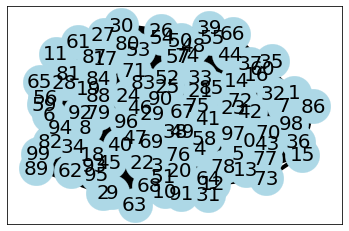

11
[[1], [8], [5], [0], [7], [0], [4], [0], [3], [0], [5], [8], [7], [3], [1], [4], [7], [2], [7], [8], [6], [0], [0], [4], [8], [3], [6], [2], [2], [5], [9], [2], [9], [9], [4], [4], [3], [8], [7], [4], [6], [0], [3], [9], [4], [9], [9], [1], [6], [0], [9], [7], [4], [9], [1], [2], [5], [3], [1], [3], [0], [1], [6], [0], [0], [2], [0], [2], [3], [6], [4], [0], [6], [8], [0], [6], [1], [4], [7], [4], [0], [3], [7], [4], [6], [5], [3], [4], [4], [3], [1], [0], [0], [2], [6], [1], [9], [0], [3], [9], [9], [4], [8], [3], [2], [4], [9], [3], [5], [2], [6, 29, 60, 1], [9, 5, 25, 10, 4], [3, 7], [0, 41, 66, 3], [8, 85, 7], [1, 25, 5, 9], [2, 40, 74, 85, 7], [6, 64, 92, 3, 7], [8, 9], [9, 5, 25, 10, 4]]


In [5]:
import time
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
import math
import copy


#create Initial Journeys
loj=[]
p=random.normalvariate(0,0.25)
for i in range(0,10):
  r=random.sample(range(0, 10),2)
  loj.append(r)

ran=random.randint(0,96) #Selection of a Random number to check the status
check=True

#print(loj)
cpaths6=copy.deepcopy(loj)

#Create a Graph
seed=1000           
G= nx.gnp_random_graph (100, .3, seed=seed )
nx.is_connected(G)

#Plot the Graph
links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                                 # draw edges
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.show()

#Assign Weights to edges
wght={}
for (u, v) in G.edges():
  eweights=G.edges[u,v]['weight'] = random.randint(1,20)
  wght[(u,v)]=G.edges[u,v]['weight']

#print(wght)

base=[0,0.1,0.1,0.1,0.15,0.25,0.3,0.65,0.85,1.0,0.95,0.9,0.9,0.9,0.9,0.95,0.95,0.9,1.0,1.0,0.85,0.7,0.6,0.45,0.3]
paths=[]
time=[]
tr2=[]

#Loop Starts
for x in range(1,25):
  for y in range(1,5): 

    #Get Paths for Journeys  
    for l in cpaths6:
      paths.append(nx.shortest_path(G,l[0],l[1],weight='weight',method='dijkstra'))
      #print(nx.shortest_path(G,l[0],l[1],weight='weight',method='dijkstra'))
   
    #print(paths)
    if(x*y>=ran and check):
      print(ran)            #Printing Status of Existing journeys based on a Random Number
      print(paths)          #The Lists with only one element have completed their journey
      check=False
    
    #Update Weights
    p=random.normalvariate(0,0.25)
    for (u,v) in G.edges():
      ew=G.edges[u,v]['weight']=wght[(u,v)]+wght[(u,v)]*(wght[(u,v)]*p*base[x]/100)
   
    #Get Time Taken for the Paths
    for i in paths:  
        j=0
        sum=0
        pt=[]
        while(j<len(i)-1):
          sum=sum+G.edges[i[j],i[j+1]]['weight']
          pt.append(G.edges[i[j],i[j+1]]['weight'])
          j=j+1
        time.append(sum)
        tr2.append(pt)
        #print(tr2)



    #print(paths)
    #print(time)
    #print(tr2)
    #tr2=copy.deepcopy(time2)
    #cpaths2=copy.deepcopy(paths)
    #print(tr2)
    #print(paths)


    #Tracking of Journey
    for i in range(0,len(paths)):

      if(tr2[i]==[]):
        continue

      if(tr2[i][0]>=15):
        tr2[i][0]=tr2[i][0]-15
        #print(tr2)
        #print(paths)
        continue

      if(tr2[i][0]<15):
        sum=0
        ind=0
        while(sum<15):
          if(len(paths[i])<=1):
            sum=15
            continue
          if((sum+tr2[i][0])<15):
            sum=sum+tr2[i][0]
            tr2[i].remove(tr2[i][0])
            paths[i].remove(paths[i][0])
            #print(tr2)
            #print(paths)
          else:
            tr2[i][0]=tr2[i][0]-(15-sum)
            sum=15
            #print(tr2)
            #print(paths)
        continue


    # Time of Paths Remaining before Updation
    index=0
    tbch=[]
    for i in paths:  
      j=0
      sum=0
      if(len(i)>1):
        while(j<len(i)-1):
          sum=sum+G.edges[i[j],i[j+1]]['weight']
          #print(i[j],i[j+1],sum)
          j=j+1
        tbch.append(sum)
        #print(tbch)
      else:
        tbch.append(0)
        #print(tbch)
      index=index+1


    #Updation of Weights
    p=random.normalvariate(0,0.25)
    for (u,v) in G.edges():
      ew=G.edges[u,v]['weight']=wght[(u,v)]+wght[(u,v)]*(wght[(u,v)]*p*base[x]/100)

    #Updation of times in journeys
    for i in range(0,len(tr2)):
      for j in range(0,len(tr2[i])):
        if(paths[i][j]<paths[i][j+1]):
          tr2[i][j]=tr2[i][j]+tr2[i][j]*(wght[(paths[i][j],paths[i][j+1])]*p*base[x]/100)
        else:
          tr2[i][j]=tr2[i][j]+tr2[i][j]*(wght[(paths[i][j+1],paths[i][j])]*p*base[x]/100)

    #print(tr2)
    #print(paths)

    cpaths3=copy.deepcopy(paths)
    cpaths4=[]


    #Checking for Better Paths
    for l in cpaths3:
      cpaths4.append(nx.shortest_path(G,l[0],l[len(l)-1],weight='weight',method='dijkstra'))


    #Calculating Time Taken for New Paths for comparision
    index=0
    tach=[]
    for i in cpaths4:  
      j=0
      sum=0
      if(len(i)>1):
        while(j<len(i)-1):
          sum=sum+G.edges[i[j],i[j+1]]['weight']
          j=j+1
        tach.append(sum)
      else:
        tach.append(0)
      index=index+1

    # Selecting Between the Two
    cpaths5=[]
    for i in range(0,len(cpaths3)):
      if(tbch[i]!=0):
        per=((tbch[i]-tach[i])/tbch[i])*100
        per=abs(per)
        if(per>=5):
          cpaths5.append(cpaths4[i])
        else:
          cpaths5.append(cpaths3[i])
      else:
        cpaths5.append(cpaths4[i])

    #print(cpaths5)
    paths=copy.deepcopy(cpaths5)
    #print(paths)

    cpaths6=[]
    tr2=[]
    time=[]
    
    

    for i in range(0,10):
      r=random.sample(range(0, 10),2)
      cpaths6.append(r)
      loj.append(r)

#print(loj)
